Using TensorFlow backend.


(60000, 'train samlpes')
(10000, 'test_samples')
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)            

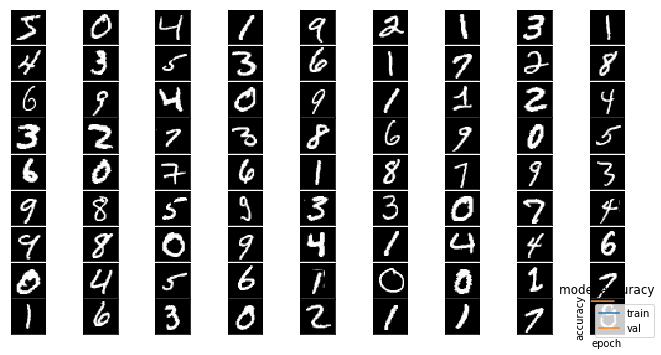

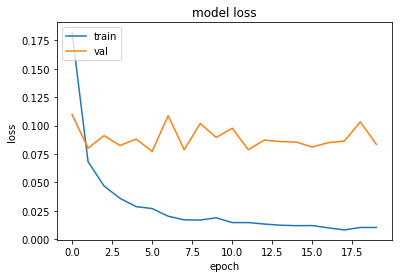

accuracy: 0.9806
[[ 972    1    0    0    1    1    2    0    3    0]
 [   2 1126    2    0    0    1    1    1    2    0]
 [   2    1 1020    0    1    0    0    3    5    0]
 [   0    0    5  987    0   12    0    2    2    2]
 [   1    0    5    0  960    1    2    2    0   11]
 [   2    0    0    6    0  880    2    1    1    0]
 [   3    2    0    0    1    4  944    0    4    0]
 [   1    4   16    0    2    0    0  989    2   14]
 [   2    1    2    7    4    8    0    3  944    3]
 [   4    4    1    5    3    2    2    1    3  984]]
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.97      0.99      0.98      1032
          3       0.98      0.98      0.98      1010
          4       0.99      0.98      0.98       982
          5       0.97      0.99      0.98       892
          6       0.99      0.99      0.99       958
          7       0.99     

In [1]:
from keras.datasets import mnist
(x_train,y_train), (x_test, y_test) = mnist.load_data()

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9,9,i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28,28)), cmap='gray')
    
from keras.utils import np_utils
nb_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samlpes')
print(x_test.shape[0], 'test_samples')
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)   

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

batch_size = 128
epochs = 20
history = model.fit(x_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_split=0.1,
                            verbose=1)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
_, acc = model.evaluate(x_test, Y_test, verbose=0)
print('accuracy: {}'.format(acc))

from sklearn.metrics import classification_report, confusion_matrix

labels_pred = model.predict_classes(x_test, verbose=0)

print(confusion_matrix(y_test, labels_pred))
print(classification_report(y_test, labels_pred))


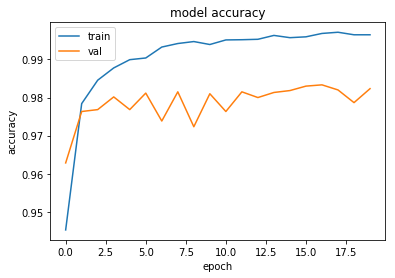

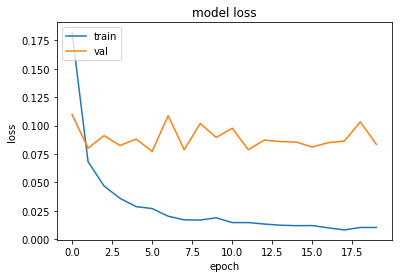

accuracy: 0.9806


In [2]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
_, acc = model.evaluate(x_test, Y_test, verbose=0)
print('accuracy: {}'.format(acc))